In [1]:
pwd

'/home/jovyan/work'

In [2]:
import pandas as pd
import linecache

In [3]:
targz_contents_fn = 'data/GHCN_20191001/daily-summaries-directory.txt'
stations_fn = 'data/GHCN_20191001/ghcnd-stations.txt'

In [4]:
linecache.getline(targz_contents_fn, 10)

'-rw-r--r--  0 0      0       64912 Oct  1 07:44 USC00214066.csv\n'

In [5]:
linecache.getline(stations_fn, 114)

'AJ000037742  40.9000   47.3000  313.0    ORDJONIKIDZE,ZERNOSOVHOZ               37742\n'

In [6]:
directory_header = ['type_permissions', 'num_links', 'owner', 'group', 'size_bytes', 'month', 'day', 'time', 'fn']

In [7]:
data_dirs = pd.read_csv(targz_contents_fn, delim_whitespace=True, header=None, names=directory_header)

In [8]:
data_dirs.head()

,type_permissions,num_links,owner,group,size_bytes,month,day,time,fn
0,-rw-r--r--,0,0,0,72466,Oct,1,07:44,USC00169027.csv
1,-rw-r--r--,0,0,0,371181,Oct,1,07:44,USC00166678.csv
2,-rw-r--r--,0,0,0,1072270,Oct,1,07:44,USC00166466.csv
3,-rw-r--r--,0,0,0,86581,Oct,1,07:44,USC00172883.csv
4,-rw-r--r--,0,0,0,3613726,Oct,1,07:44,USC00193985.csv


In [9]:
data_dirs.count()

type_permissions    114781
num_links           114781
owner               114781
group               114781
size_bytes          114781
month               114781
day                 114781
time                114781
fn                  114781
dtype: int64

In [10]:
data_dirs['fn_prefix'] = data_dirs.fn.str[0:3]

In [11]:
data_dirs.head()

,type_permissions,num_links,owner,group,size_bytes,month,day,time,fn,fn_prefix
0,-rw-r--r--,0,0,0,72466,Oct,1,07:44,USC00169027.csv,USC
1,-rw-r--r--,0,0,0,371181,Oct,1,07:44,USC00166678.csv,USC
2,-rw-r--r--,0,0,0,1072270,Oct,1,07:44,USC00166466.csv,USC
3,-rw-r--r--,0,0,0,86581,Oct,1,07:44,USC00172883.csv,USC
4,-rw-r--r--,0,0,0,3613726,Oct,1,07:44,USC00193985.csv,USC


In [12]:
unique_data_dirs = data_dirs['fn_prefix'].value_counts()

In [13]:
unique_data_dirs.head(30)

US1    35020
USC    22480
ASN    17081
CA0     7901
BR0     5934
MXN     5170
IN0     3805
USW     1742
SWE     1703
USR     1509
SF0     1154
RSM     1102
GME      967
FIE      917
CA1      876
USS      859
NOE      438
NLE      381
KZ0      328
WA0      281
CHM      226
UPM      204
SPE      183
JA0      154
RQC      151
UY0      146
UKE      108
GG0      102
GMM       94
AYM       87
Name: fn_prefix, dtype: int64

In [14]:
# We used fixed width here due to the specification from 
# https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt

ghcnd_stations_format =[
    ('ID', 0, 11, 'str'),
    ('LATITUDE', 12, 21, 'float'),
    ('LONGITUDE', 21, 30, 'float'),
    ('ELEVATION', 31, 37, 'float'),
    ('STATE', 38, 40, 'str'),
    ('NAME', 41, 71, 'str'),
    ('GSN FLAG', 72, 75, 'str'),
    ('HCN/CRN FLAG', 76, 79, 'str'),
    ('WMO ID', 80, 85, 'str'),
]
ghcnd_colspecs = []
ghcnd_names =[]
ghcnd_dtypes =[]
for name, start, stop, dtype in ghcnd_stations_format:
    ghcnd_colspecs.append((start, stop))
    ghcnd_names.append(name.lower())
    ghcnd_dtypes.append(dtype)
ghcnd_name_type_dict = dict(zip(ghcnd_names, ghcnd_dtypes))                            

In [15]:
ghcnd_stations = pd.read_fwf(stations_fn, 
                             colspecs=ghcnd_colspecs,
                             header=None,
                             names=ghcnd_names,
                             dtype=ghcnd_name_type_dict
                            )

In [16]:
ghcnd_stations.head(20)

,id,latitude,longitude,elevation,state,name,gsn flag,hcn/crn flag,wmo id
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,NaN,41194
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217
5,AEM00041218,24.2620,55.6090,264.9,NaN,AL AIN INTL,NaN,NaN,41218
6,AF000040930,35.3170,69.0170,3366.0,NaN,NORTH-SALANG,GSN,NaN,40930
7,AFM00040938,34.2100,62.2280,977.2,NaN,HERAT,NaN,NaN,40938
8,AFM00040948,34.5660,69.2120,1791.3,NaN,KABUL INTL,NaN,NaN,40948
9,AFM00040990,31.5000,65.8500,1010.0,NaN,KANDAHAR AIRPORT,NaN,NaN,40990


In [17]:
ghcnd_stations['state'].value_counts()

TX    5002
CO    4161
CA    2790
NC    2143
NE    2097
      ... 
PW      11
UM      11
MP      11
PI       1
SA       1
Name: state, Length: 76, dtype: int64

In [18]:
ghcnd_stations[ghcnd_stations['id'] == 'USW00094008']

,id,latitude,longitude,elevation,state,name,gsn flag,hcn/crn flag,wmo id
113843,USW00094008,48.2138,-106.6213,696.5,MT,GLASGOW INTL AP,GSN,HCN,72768


In [19]:
ghcnd_stations[ghcnd_stations['hcn/crn flag'] == 'HCN']

,id,latitude,longitude,elevation,state,name,gsn flag,hcn/crn flag,wmo id
87467,USC00011084,31.0583,-87.0550,25.9,AL,BREWTON 3 SSE,NaN,HCN,NaN
87528,USC00012813,30.5467,-87.8808,7.0,AL,FAIRHOPE 2 NE,NaN,HCN,NaN
87543,USC00013160,32.8347,-88.1342,38.1,AL,GAINESVILLE LOCK,NaN,HCN,NaN
87553,USC00013511,32.6922,-87.5761,75.9,AL,GREENSBORO,NaN,HCN,NaN
87573,USC00013816,31.8814,-86.2503,132.0,AL,HIGHLAND HOME,NaN,HCN,NaN
...,...,...,...,...,...,...,...,...,...
113901,USW00094224,46.1569,-123.8825,2.7,OR,ASTORIA RGNL AP,NaN,HCN,72791
113933,USW00094728,40.7789,-73.9692,39.6,NY,NEW YORK CNTRL PK TWR,NaN,HCN,72506
113943,USW00094793,41.1667,-71.5833,33.5,RI,BLOCK ISLAND STATE AP,NaN,HCN,NaN
113944,USW00094794,43.1450,-75.3839,216.7,NY,UTICA ONEIDA CO AP,NaN,HCN,NaN


In [20]:
ghcnd_stations[ghcnd_stations['name'].str.contains(' AP')]

,id,latitude,longitude,elevation,state,name,gsn flag,hcn/crn flag,wmo id
240,AQC00914869,-14.3333,-170.7167,3.0,AS,TAFUNA AP TUTUILA,NaN,NaN,NaN
244,AQW00061705,-14.3306,-170.7136,3.7,AS,PAGO PAGO WSO AP,GSN,NaN,91765
8634,ASN00041396,-28.7333,151.8833,-999.9,NaN,GLEN APLIN,NaN,NaN,NaN
17572,BDM00078016,32.3667,-64.6833,6.1,NaN,L F WADE INTL AP KINDLEY FLD,GSN,NaN,78016
18121,BR000759000,-7.2000,-59.8900,0.0,NaN,VILA DO APUI,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
113998,USW00094991,40.6331,-93.9019,344.7,IA,LAMONI MUNI AP,NaN,NaN,NaN
114000,USW00094993,45.6689,-96.9914,353.9,SD,SISSETON MUNI AP,NaN,NaN,NaN
114001,USW00094994,43.1561,-90.6775,204.8,WI,BOSCOBEL AP,NaN,NaN,NaN
114455,VQW00011624,17.7028,-64.8056,18.6,VI,CHRISTIANSTED AP,NaN,NaN,78551


In [21]:
ghcnd_stations[ghcnd_stations['name'].str.contains('palo alto'.upper())]

,id,latitude,longitude,elevation,state,name,gsn flag,hcn/crn flag,wmo id
40833,MXN00001015,21.9000,-101.9667,2037.3,NaN,PALO ALTO,NaN,NaN,NaN
45009,MXN00026306,27.2833,-109.3500,83.8,NaN,KM. 91 + 600 PALO ALTO,NaN,NaN,NaN
56238,US1CASC0014,37.4190,-122.1214,8.8,CA,PALO ALTO 1.7 NE,NaN,NaN,NaN
56240,US1CASC0017,37.4516,-122.1486,9.8,CA,PALO ALTO 1.2 NE,NaN,NaN,NaN
56244,US1CASC0028,37.4098,-122.1348,18.3,CA,PALO ALTO 0.8 NNE,NaN,NaN,NaN
56471,US1CASM0034,37.4637,-122.1372,4.6,CA,EAST PALO ALTO 0.3 WSW,NaN,NaN,NaN
89375,USC00046642,37.4333,-122.1667,18.0,CA,PALO ALTO,NaN,NaN,NaN
89376,USC00046646,37.4436,-122.1403,7.6,CA,PALO ALTO,NaN,NaN,NaN
96256,USC00226670,33.6500,-88.8500,76.2,MS,PALO ALTO,NaN,NaN,NaN


In [22]:
palo_alto_data = pd.read_csv('data/GHCN_20191001/USC00046642.csv')
palo_alto_data

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT05,WT05_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT11,WT11_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES
0,USC00046642,1906-03-01,37.43333,-122.16667,18.0,"PALO ALTO, CA US",0.0,"P,,6",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00046642,1906-03-02,37.43333,-122.16667,18.0,"PALO ALTO, CA US",0.0,"P,,6",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00046642,1906-03-03,37.43333,-122.16667,18.0,"PALO ALTO, CA US",0.0,"P,,6",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00046642,1906-03-04,37.43333,-122.16667,18.0,"PALO ALTO, CA US",53.0,",,6",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00046642,1906-03-05,37.43333,-122.16667,18.0,"PALO ALTO, CA US",264.0,",,6",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12209,USC00046642,1953-08-27,37.43333,-122.16667,18.0,"PALO ALTO, CA US",0.0,",,0",0.0,",,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12210,USC00046642,1953-08-28,37.43333,-122.16667,18.0,"PALO ALTO, CA US",0.0,",,0",0.0,",,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12211,USC00046642,1953-08-29,37.43333,-122.16667,18.0,"PALO ALTO, CA US",0.0,",,0",0.0,",,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12212,USC00046642,1953-08-30,37.43333,-122.16667,18.0,"PALO ALTO, CA US",15.0,",,0",0.0,",,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
palo_alto_data2 = pd.read_csv('data/GHCN_20191001/USC00046646.csv')
palo_alto_data2

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT01,WT01_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT11,WT11_ATTRIBUTES
0,USC00046646,1953-09-01,37.4436,-122.1402,7.6,"PALO ALTO, CA US",0.0,",,0,",0.0,",,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00046646,1953-09-02,37.4436,-122.1402,7.6,"PALO ALTO, CA US",0.0,",,0,0800",0.0,",,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00046646,1953-09-03,37.4436,-122.1402,7.6,"PALO ALTO, CA US",0.0,",,0,0800",0.0,",,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00046646,1953-09-04,37.4436,-122.1402,7.6,"PALO ALTO, CA US",0.0,",,0,0800",0.0,",,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00046646,1953-09-05,37.4436,-122.1402,7.6,"PALO ALTO, CA US",0.0,",,0,0800",0.0,",,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22628,USC00046646,2017-12-18,37.4436,-122.1402,7.6,"PALO ALTO, CA US",0.0,",,7,0800",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22629,USC00046646,2017-12-25,37.4436,-122.1402,7.6,"PALO ALTO, CA US",0.0,",,7,0800",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22630,USC00046646,2017-12-26,37.4436,-122.1402,7.6,"PALO ALTO, CA US",0.0,",,7,0800",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22631,USC00046646,2017-12-29,37.4436,-122.1402,7.6,"PALO ALTO, CA US",0.0,",,7,0800",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
palo_alto_data2['TMAX'].hist(bins=50)

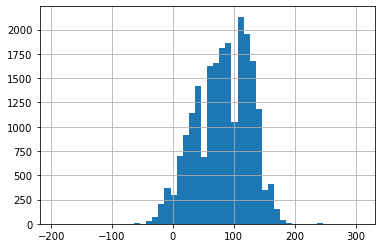

In [25]:
palo_alto_data2['TMIN'].hist(bins=50)

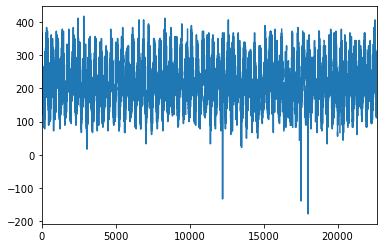

In [26]:
palo_alto_data2['TMAX'].plot()

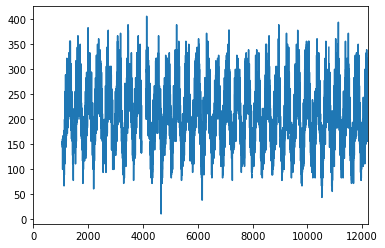

In [27]:
palo_alto_data['TMAX'].plot()

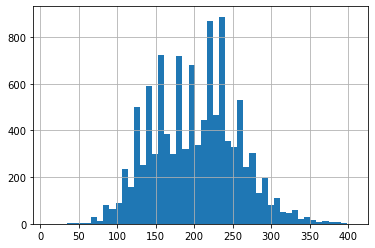

In [28]:
palo_alto_data['TMAX'].hist(bins=50)

In [29]:
pa_temp = pd.DataFrame(palo_alto_data[['DATE','TMAX','TMIN']]).dropna()
pa_temp

,DATE,TMAX,TMIN
1061,1922-12-01,150.0,17.0
1062,1922-12-02,156.0,6.0
1063,1922-12-03,144.0,0.0
1064,1922-12-04,128.0,-11.0
1065,1922-12-05,161.0,78.0
...,...,...,...
12209,1953-08-27,261.0,128.0
12210,1953-08-28,250.0,122.0
12211,1953-08-29,244.0,133.0
12212,1953-08-30,206.0,150.0


In [30]:
pa_temp['YEAR'] = pa_temp['DATE'].str[0:4]
pa_temp['MONTH_DAY'] = pa_temp['DATE'].str[5:]
pa_temp

,DATE,TMAX,TMIN,YEAR,MONTH_DAY
1061,1922-12-01,150.0,17.0,1922,12-01
1062,1922-12-02,156.0,6.0,1922,12-02
1063,1922-12-03,144.0,0.0,1922,12-03
1064,1922-12-04,128.0,-11.0,1922,12-04
1065,1922-12-05,161.0,78.0,1922,12-05
...,...,...,...,...,...
12209,1953-08-27,261.0,128.0,1953,08-27
12210,1953-08-28,250.0,122.0,1953,08-28
12211,1953-08-29,244.0,133.0,1953,08-29
12212,1953-08-30,206.0,150.0,1953,08-30


In [31]:
pa_tmax_yearly = pa_temp.pivot('MONTH_DAY', 'YEAR', 'TMAX')
pa_tmax_yearly

YEAR,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,...,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953
MONTH_DAY,,,,,,,,,,,,,,,,,,,,,
01-01,NaN,122.0,83.0,133.0,106.0,156.0,156.0,122.0,167.0,NaN,...,128.0,NaN,144.0,117.0,150.0,106.0,100.0,144.0,78.0,133.0
01-02,NaN,139.0,83.0,156.0,100.0,183.0,156.0,128.0,167.0,NaN,...,100.0,133.0,117.0,128.0,161.0,117.0,83.0,139.0,72.0,106.0
01-03,NaN,111.0,78.0,128.0,122.0,156.0,133.0,144.0,144.0,NaN,...,122.0,89.0,167.0,106.0,144.0,83.0,89.0,128.0,94.0,111.0
01-04,NaN,133.0,122.0,117.0,139.0,139.0,178.0,139.0,161.0,NaN,...,89.0,83.0,133.0,117.0,172.0,72.0,72.0,172.0,94.0,133.0
01-05,NaN,156.0,128.0,100.0,133.0,172.0,122.0,106.0,133.0,NaN,...,111.0,78.0,189.0,128.0,167.0,67.0,67.0,150.0,106.0,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,144.0,128.0,83.0,122.0,122.0,144.0,183.0,133.0,NaN,139.0,...,100.0,150.0,133.0,133.0,67.0,150.0,122.0,150.0,133.0,NaN
12-28,144.0,161.0,106.0,133.0,111.0,128.0,150.0,161.0,NaN,117.0,...,117.0,144.0,117.0,94.0,100.0,150.0,83.0,161.0,139.0,NaN
12-29,106.0,144.0,128.0,111.0,122.0,128.0,150.0,144.0,NaN,89.0,...,111.0,178.0,106.0,139.0,106.0,150.0,106.0,167.0,106.0,NaN


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

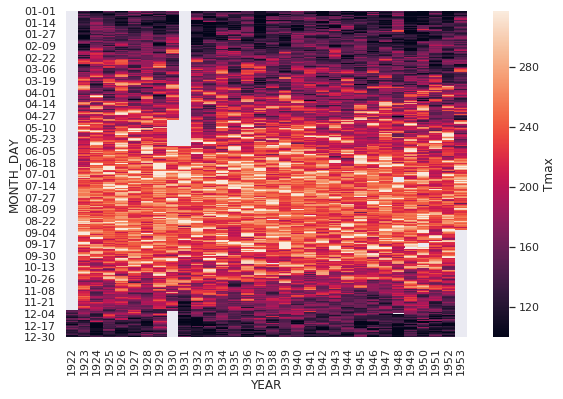

In [33]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(pa_tmax_yearly, robust=True, cbar_kws={'label':'Tmax'})

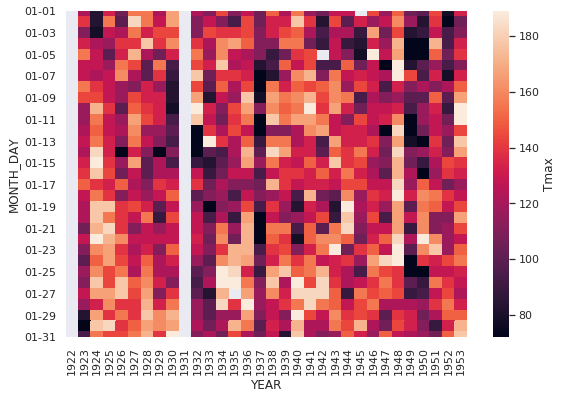

In [34]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(pa_tmax_yearly[0:31], robust=True, cbar_kws={'label':'Tmax'})

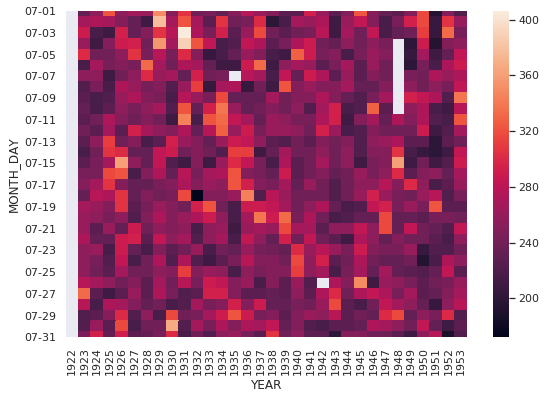

In [35]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(pa_tmax_yearly.loc['07-01':'07-31'])

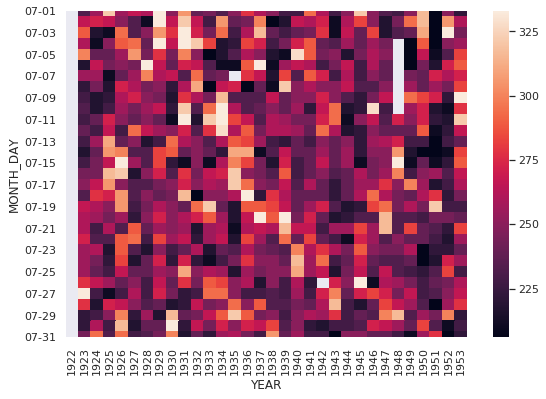

In [36]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(pa_tmax_yearly.loc['07-01':'07-31'], robust=True)

In [37]:
pa_tmin_yearly = pa_temp.pivot('MONTH_DAY', 'YEAR', 'TMIN')
pa_tmin_yearly

YEAR,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,...,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953
MONTH_DAY,,,,,,,,,,,,,,,,,,,,,
01-01,NaN,33.0,6.0,56.0,-6.0,28.0,100.0,28.0,17.0,NaN,...,67.0,NaN,67.0,0.0,6.0,39.0,17.0,22.0,-11.0,89.0
01-02,NaN,17.0,-50.0,11.0,6.0,67.0,106.0,28.0,22.0,NaN,...,78.0,11.0,83.0,39.0,122.0,39.0,6.0,11.0,-22.0,67.0
01-03,NaN,17.0,33.0,17.0,72.0,117.0,100.0,56.0,-6.0,NaN,...,17.0,33.0,61.0,-17.0,106.0,28.0,-28.0,100.0,-17.0,83.0
01-04,NaN,72.0,0.0,11.0,33.0,133.0,94.0,22.0,89.0,NaN,...,17.0,11.0,78.0,-28.0,111.0,-39.0,-28.0,100.0,22.0,56.0
01-05,NaN,56.0,-17.0,72.0,61.0,67.0,61.0,17.0,56.0,NaN,...,17.0,11.0,100.0,-17.0,89.0,-50.0,-44.0,67.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,33.0,-17.0,11.0,-6.0,-22.0,78.0,50.0,28.0,NaN,100.0,...,50.0,106.0,94.0,17.0,50.0,-6.0,78.0,100.0,50.0,NaN
12-28,89.0,-22.0,56.0,17.0,-11.0,61.0,61.0,-6.0,NaN,78.0,...,44.0,117.0,0.0,61.0,22.0,0.0,22.0,100.0,50.0,NaN
12-29,28.0,50.0,28.0,17.0,-11.0,100.0,72.0,-11.0,NaN,17.0,...,50.0,133.0,11.0,11.0,6.0,0.0,44.0,122.0,78.0,NaN


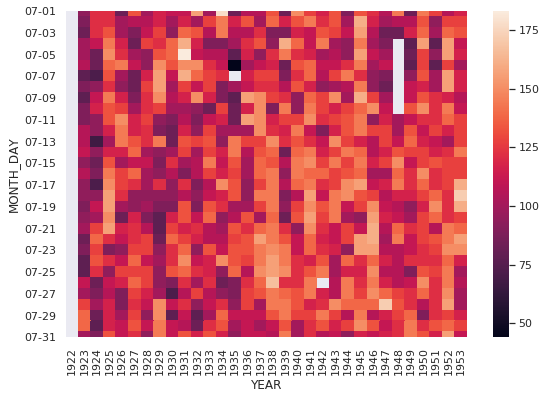

In [38]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(pa_tmin_yearly.loc['07-01':'07-31'])

In [39]:
pa_temp2 = pd.DataFrame(palo_alto_data2[['DATE','TMAX','TMIN']]).dropna()
pa_temp2

,DATE,TMAX,TMIN
0,1953-09-01,239.0,150.0
1,1953-09-02,256.0,128.0
2,1953-09-03,294.0,139.0
3,1953-09-04,233.0,150.0
4,1953-09-05,222.0,161.0
...,...,...,...
22628,2017-12-18,183.0,11.0
22629,2017-12-25,111.0,33.0
22630,2017-12-26,133.0,22.0
22631,2017-12-29,156.0,17.0


In [40]:
pa_temp2['YEAR'] = pa_temp2['DATE'].str[0:4]
pa_temp2['MONTH_DAY'] = pa_temp2['DATE'].str[5:]
pa_temp2

,DATE,TMAX,TMIN,YEAR,MONTH_DAY
0,1953-09-01,239.0,150.0,1953,09-01
1,1953-09-02,256.0,128.0,1953,09-02
2,1953-09-03,294.0,139.0,1953,09-03
3,1953-09-04,233.0,150.0,1953,09-04
4,1953-09-05,222.0,161.0,1953,09-05
...,...,...,...,...,...
22628,2017-12-18,183.0,11.0,2017,12-18
22629,2017-12-25,111.0,33.0,2017,12-25
22630,2017-12-26,133.0,22.0,2017,12-26
22631,2017-12-29,156.0,17.0,2017,12-29


In [41]:
pa_tmin_yearly2 = pa_temp2.pivot('MONTH_DAY', 'YEAR', 'TMIN')
pa_tmin_yearly2

YEAR,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
MONTH_DAY,,,,,,,,,,,,,,,,,,,,,
01-01,NaN,11.0,128.0,89.0,0.0,44.0,22.0,-39.0,-22.0,39.0,...,0.0,67.0,NaN,28.0,28.0,-6.0,NaN,-11.0,0.0,28.0
01-02,NaN,17.0,17.0,22.0,0.0,39.0,28.0,-56.0,-39.0,11.0,...,6.0,61.0,28.0,83.0,28.0,-17.0,17.0,-11.0,17.0,56.0
01-03,NaN,78.0,-11.0,33.0,11.0,33.0,-11.0,0.0,-39.0,56.0,...,11.0,NaN,33.0,50.0,56.0,-11.0,22.0,-11.0,50.0,56.0
01-04,NaN,50.0,-17.0,33.0,6.0,17.0,-11.0,-17.0,-33.0,11.0,...,NaN,-28.0,NaN,11.0,33.0,-11.0,11.0,-11.0,50.0,83.0
01-05,NaN,6.0,50.0,83.0,56.0,6.0,100.0,-28.0,-33.0,6.0,...,67.0,33.0,NaN,11.0,28.0,11.0,NaN,22.0,83.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,67.0,-22.0,28.0,-28.0,22.0,89.0,-11.0,0.0,11.0,-33.0,...,6.0,0.0,50.0,39.0,44.0,NaN,0.0,-22.0,6.0,NaN
12-28,44.0,22.0,11.0,-17.0,33.0,39.0,0.0,44.0,0.0,-28.0,...,0.0,NaN,50.0,22.0,11.0,6.0,0.0,-28.0,6.0,NaN
12-29,11.0,-6.0,-17.0,-17.0,106.0,28.0,-11.0,-11.0,17.0,-28.0,...,44.0,11.0,50.0,-156.0,22.0,22.0,22.0,-6.0,0.0,17.0


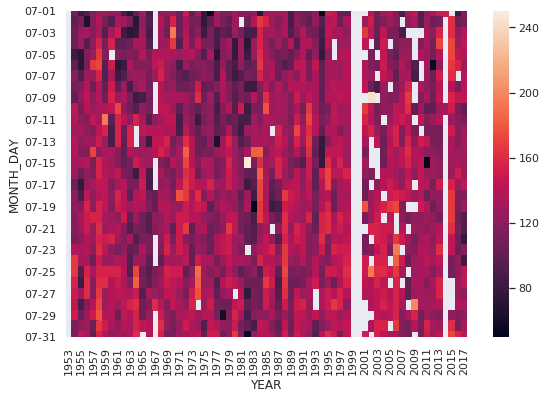

In [42]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(pa_tmin_yearly2.loc['07-01':'07-31'], vmin=50, vmax=250)

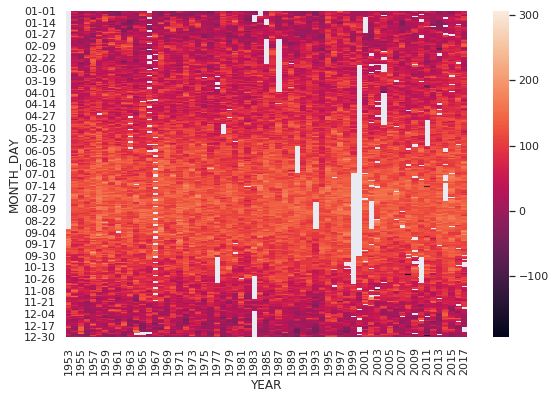

In [43]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(pa_tmin_yearly2)

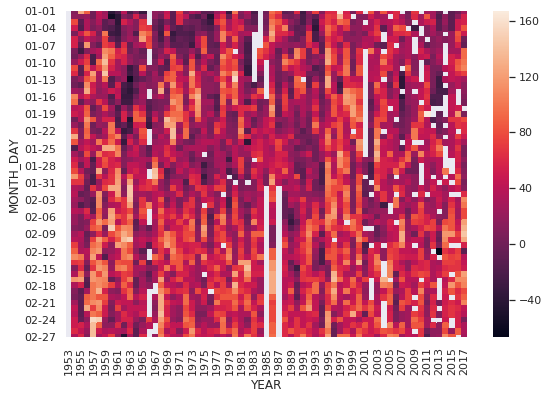

In [44]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(pa_tmin_yearly2.loc['01-01':'02-28'])

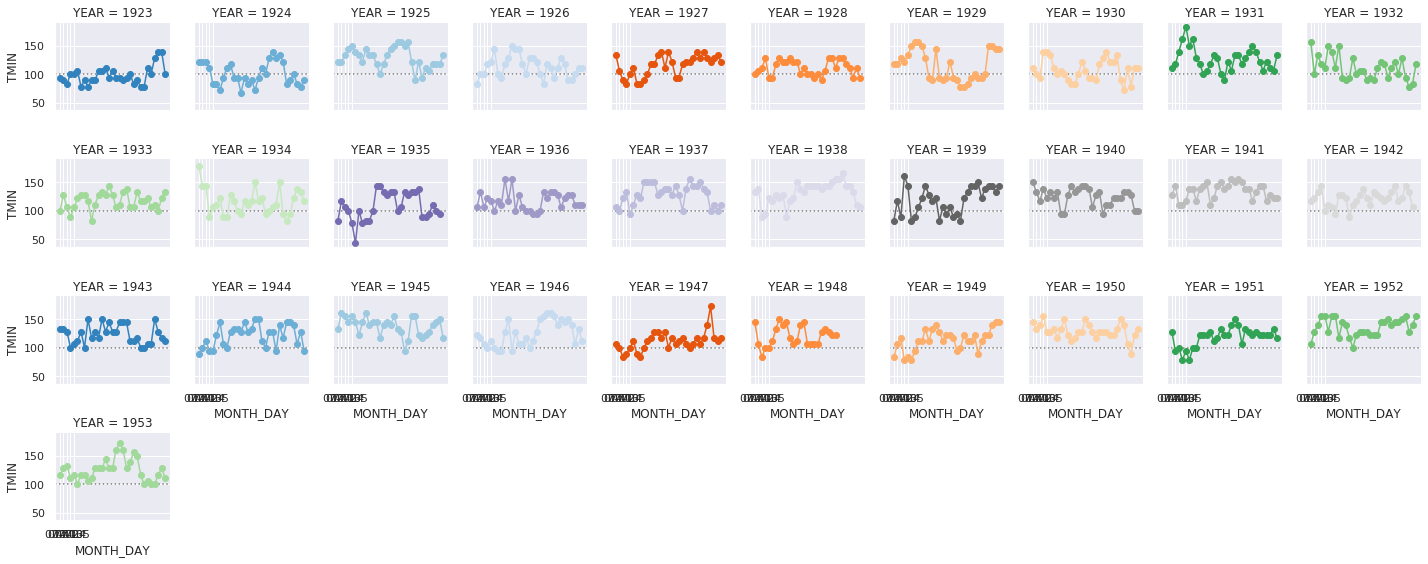

In [45]:
import numpy as np

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(pa_temp[pa_temp['MONTH_DAY'].str.contains('07-')],
                     col="YEAR",
                     hue="YEAR",
                     palette="tab20c",
                     col_wrap=10,
                     height=2)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=100, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "MONTH_DAY", "TMIN", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

In [46]:
# Plot Tmin for a day as a function of year
pa_tmin_per_day2 = pa_temp2.pivot('YEAR', 'MONTH_DAY', 'TMIN')
pa_tmin_per_day2

MONTH_DAY,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,...,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31
YEAR,,,,,,,,,,,,,,,,,,,,,
1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.0,0.0,33.0,6.0,-6.0,67.0,44.0,11.0,-6.0,-11.0
1954,11.0,17.0,78.0,50.0,6.0,56.0,56.0,6.0,0.0,22.0,...,11.0,33.0,72.0,11.0,17.0,-22.0,22.0,-6.0,44.0,50.0
1955,128.0,17.0,-11.0,-17.0,50.0,11.0,-11.0,-28.0,22.0,50.0,...,139.0,139.0,83.0,133.0,139.0,28.0,11.0,-17.0,28.0,28.0
1956,89.0,22.0,33.0,33.0,83.0,44.0,117.0,11.0,61.0,72.0,...,6.0,-17.0,-22.0,-22.0,-11.0,-28.0,-17.0,-17.0,-6.0,-6.0
1957,0.0,0.0,11.0,6.0,56.0,28.0,11.0,28.0,-22.0,-22.0,...,6.0,0.0,11.0,44.0,50.0,22.0,33.0,106.0,50.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,-6.0,-17.0,-11.0,-11.0,11.0,22.0,17.0,28.0,39.0,28.0,...,NaN,0.0,6.0,-11.0,NaN,NaN,6.0,22.0,6.0,11.0
2014,NaN,17.0,22.0,11.0,NaN,11.0,NaN,NaN,NaN,NaN,...,106.0,83.0,83.0,44.0,33.0,0.0,0.0,22.0,28.0,11.0
2015,-11.0,-11.0,-11.0,-11.0,22.0,22.0,22.0,28.0,56.0,56.0,...,106.0,89.0,56.0,17.0,NaN,-22.0,-28.0,-6.0,-6.0,-6.0


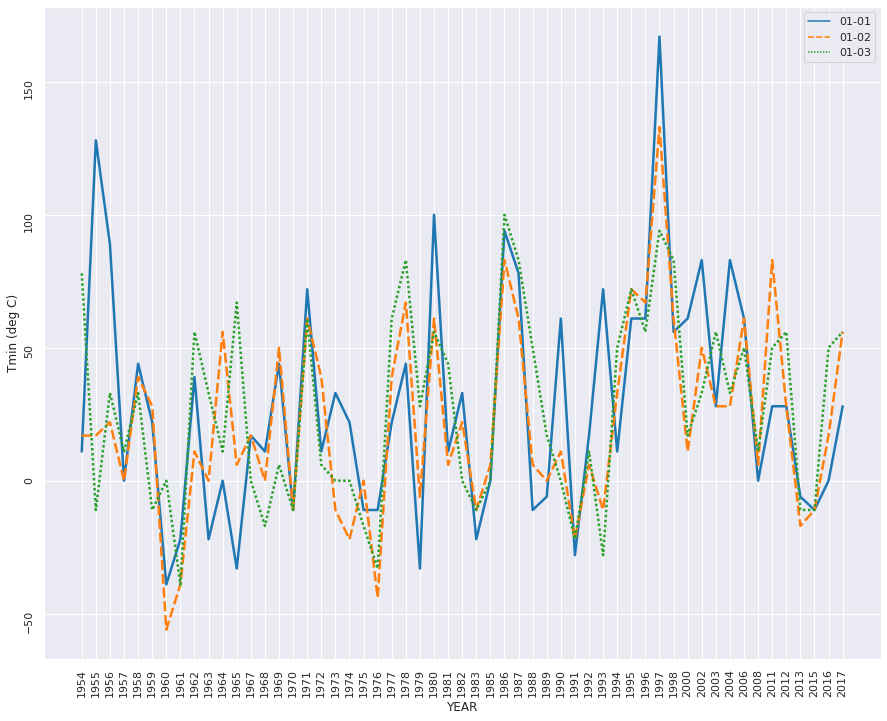

In [47]:
f, ax = plt.subplots(figsize=(15,12))
g = sns.lineplot(data=pa_tmin_per_day2[['01-01','01-02', '01-03']].dropna(),
             palette='tab10',
             linewidth=2.5,)
g.set_ylabel('Tmin (deg C)')
g.tick_params(rotation=90)

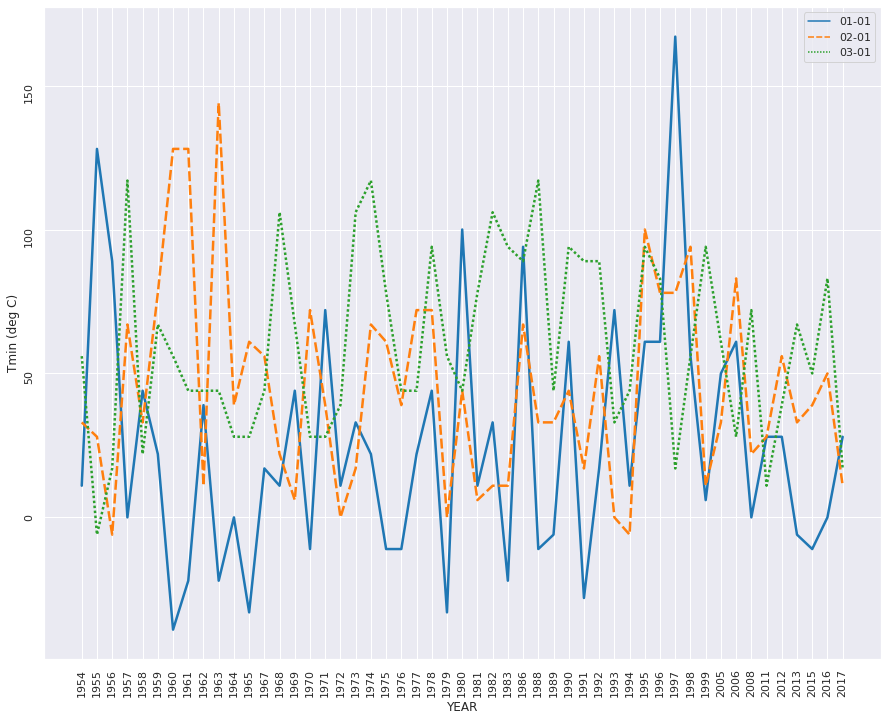

In [48]:
f, ax = plt.subplots(figsize=(15,12))
g = sns.lineplot(data=pa_tmin_per_day2[['01-01','02-01', '03-01']].dropna(),
             palette='tab10',
             linewidth=2.5,)
g.set_ylabel('Tmin (deg C)')
g.tick_params(rotation=90)

In [49]:
pa_tmin_per_day2.index.array.astype(float)

array([1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961.,
       1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970.,
       1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979.,
       1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017.])

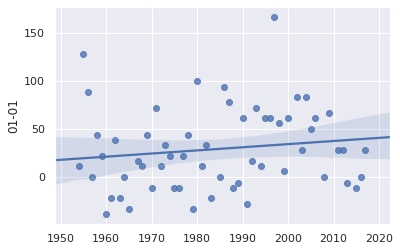

In [50]:
sns.regplot(x=pa_tmin_per_day2.index.array.astype(float), y='01-01', data=pa_tmin_per_day2)

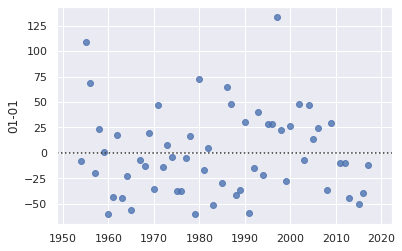

In [51]:
sns.residplot(x=pa_tmin_per_day2.index.array.astype(float), y='01-01', data=pa_tmin_per_day2)

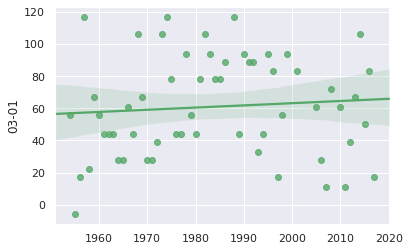

In [52]:
sns.regplot(x=pa_tmin_per_day2.index.array.astype(float), y='03-01', data=pa_tmin_per_day2, color='g')

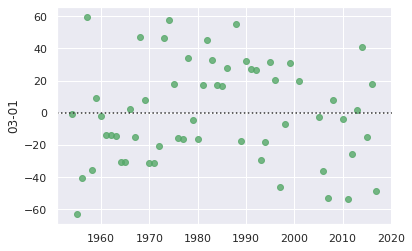

In [53]:
sns.residplot(x=pa_tmin_per_day2.index.array.astype(float), y='03-01', data=pa_tmin_per_day2, color='g')

(1950, 2020)

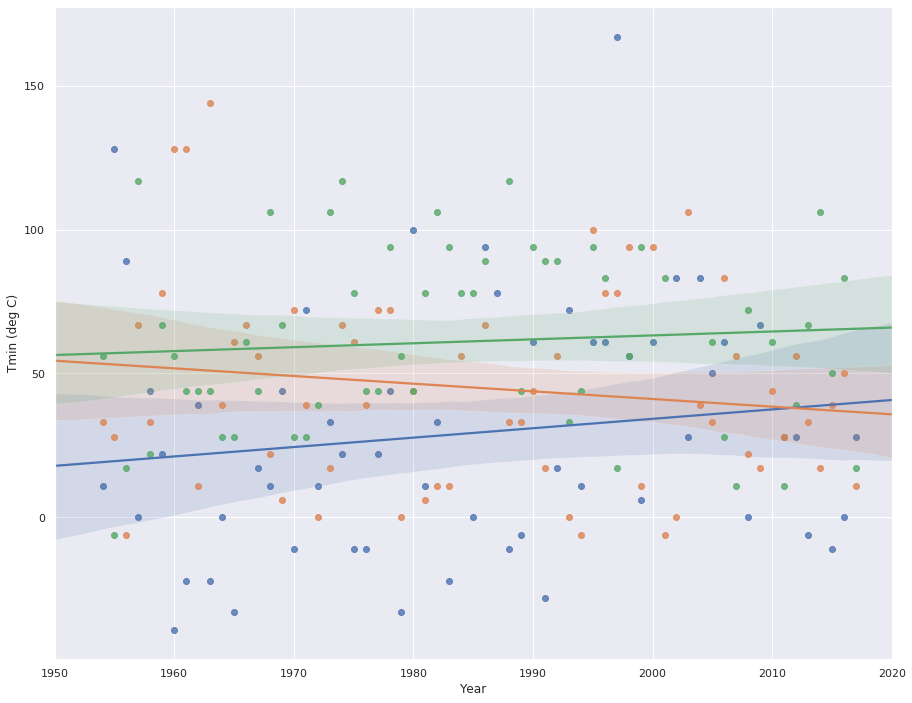

In [54]:
f, ax = plt.subplots(figsize=(15,12))
for date in ['{:02}-01'.format(x) for x in range(1,4)]:
    g = sns.regplot(x=pa_tmin_per_day2.index.array.astype(float), y=date, data=pa_tmin_per_day2)
g.set_ylabel('Tmin (deg C)')
g.set_xlabel('Year')
g.set_xlim([1950,2020])